Problem Statement

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. 

While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

-This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. 
-Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. 
-Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

-The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [1]:
import pandas as pd
import numpy as np
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import requests
from scipy.stats import norm
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from scikitplot.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
dictionary = pd.read_csv('train_data_dictionary.csv')
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [4]:
data=pd.read_csv('train_data.csv')
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
data['Bed Grade'].fillna(statistics.mode(data['Bed Grade']),inplace=True)
data['City_Code_Patient'].fillna(statistics.mode(data['City_Code_Patient']),inplace=True)

In [9]:
data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [10]:
# Check for unique values in every column
for features in data.columns:
    print('Unique Values for {}'.format(features))
    print(data[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[2. 3. 4. 1.]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 

In [11]:
numeric = [feature for feature in data.columns if data[feature].dtype != 'O']
numeric

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit']

In [12]:
category = [feature for feature in data.columns if data[feature].dtype == 'O']
category

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

Hospital_type_code
a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
7
Stay                    0-10     11-20     21-30     31-40     41-50  \
Hospital_type_code                                                     
a                   0.033159  0.125007  0.126511  0.075286  0.012910   
b                   0.016157  0.043754  0.061365  0.038893  0.012225   
c                   0.011267  0.032402  0.039336  0.025820  0.005879   
d                   0.004126  0.013890  0.017357  0.011638  0.002387   
e                   0.005668  0.020864  0.020488  0.012750  0.002399   
f                   0.003213  0.007323  0.005957  0.006573  0.000641   
g                   0.000534  0.002142  0.003737  0.002258  0.000437   

Stay                   51-60     61-70     71-80     81-90    91-100  \
Hospital_type_code                                                     
a                   0.045902  0.002902  0.011688  0.005935  0.0

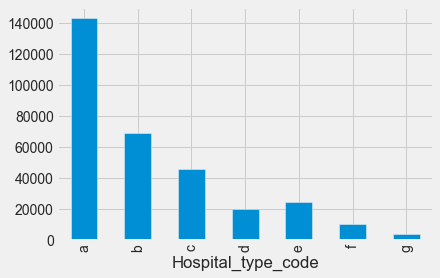

-----------------
Hospital_region_code
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
3
Stay                      0-10     11-20     21-30     31-40     41-50  \
Hospital_region_code                                                     
X                     0.025578  0.106410  0.121744  0.071694  0.013833   
Y                     0.032807  0.093538  0.099219  0.066933  0.015815   
Z                     0.015739  0.045434  0.053788  0.034591  0.007229   

Stay                     51-60     61-70     71-80     81-90    91-100  \
Hospital_region_code                                                     
X                     0.046235  0.003178  0.012847  0.005998  0.003602   
Y                     0.040897  0.003718  0.012778  0.006092  0.003354   
Z                     0.022836  0.001721  0.006576  0.003103  0.001727   

Stay                  More than 100 Days  
Hospital_region_code                      
X                               0.007600  
Y          

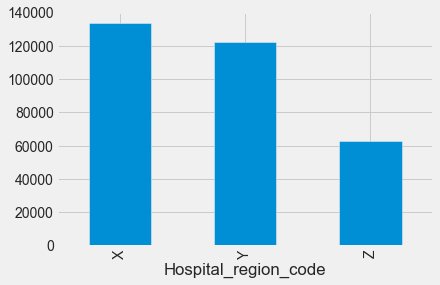

-----------------
Department
gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64
5
Stay                    0-10     11-20     21-30     31-40     41-50  \
Department                                                             
TB & Chest disease  0.002484  0.007471  0.008221  0.005505  0.000942   
anesthesia          0.004770  0.027707  0.028106  0.015570  0.002672   
gynecology          0.059192  0.187446  0.214745  0.136714  0.030370   
radiotherapy        0.007471  0.021945  0.022808  0.014800  0.002760   
surgery             0.000207  0.000813  0.000870  0.000628  0.000132   

Stay                   51-60     61-70     71-80     81-90    91-100  \
Department                                                             
TB & Chest disease  0.003288  0.000239  0.000923  0.000440  0.000201   
anesthesia          0.007936  0.000543  0.002208  0.001206  0.000490   


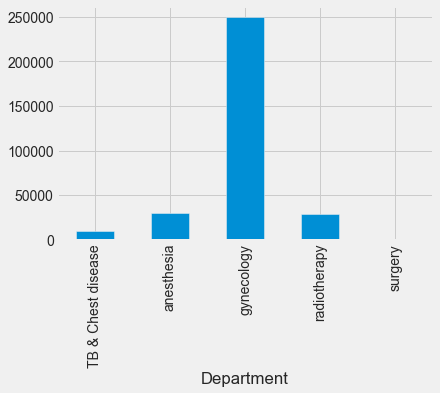

-----------------
Ward_Type
R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64
6
Stay           0-10     11-20     21-30     31-40     41-50     51-60  \
Ward_Type                                                               
P          0.001448  0.004374  0.005659  0.002340  0.000895  0.000584   
Q          0.026112  0.091710  0.109082  0.053941  0.015532  0.020434   
R          0.029236  0.099300  0.115244  0.069235  0.013406  0.043126   
S          0.016980  0.049143  0.043531  0.046781  0.006827  0.045227   
T          0.000345  0.000845  0.001225  0.000914  0.000217  0.000597   
U          0.000003  0.000009  0.000009  0.000006  0.000000  0.000000   

Stay          61-70     71-80     81-90    91-100  More than 100 Days  
Ward_Type                                                              
P          0.000229  0.000166  0.000044  0.000050            0.000057  
Q          0.003096  0.006133  0.002487  0.001448            0.0034

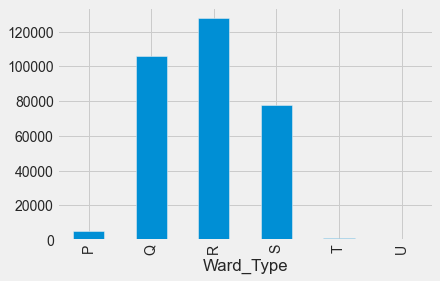

-----------------
Ward_Facility_Code
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64
6
Stay                    0-10     11-20     21-30     31-40     41-50  \
Ward_Facility_Code                                                     
A                   0.007480  0.019266  0.023477  0.015711  0.003762   
B                   0.008187  0.024727  0.027098  0.020164  0.003423   
C                   0.012313  0.037897  0.024705  0.017558  0.001868   
D                   0.012307  0.030913  0.047416  0.029211  0.010523   
E                   0.010947  0.047359  0.051366  0.028938  0.005351   
F                   0.022890  0.085219  0.100688  0.061635  0.011949   

Stay                   51-60     61-70     71-80     81-90    91-100  \
Ward_Facility_Code                                                     
A                   0.009908  0.000801  0.003037  0.001281  0.000914   
B                   0.015887  0.000785  0.004337  0.00241

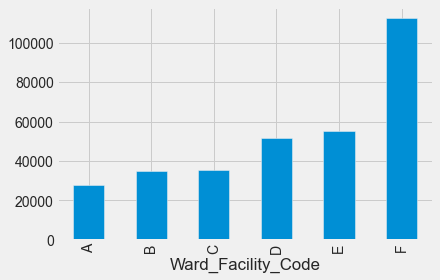

-----------------
Type of Admission
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
3
Stay                   0-10     11-20     21-30     31-40     41-50     51-60  \
Type of Admission                                                               
Emergency          0.044649  0.099106  0.086042  0.059418  0.013017  0.037323   
Trauma             0.016732  0.105970  0.145221  0.088265  0.018741  0.057499   
Urgent             0.012743  0.040306  0.043487  0.025534  0.005119  0.015146   

Stay                  61-70     71-80     81-90    91-100  More than 100 Days  
Type of Admission                                                              
Emergency          0.003065  0.010599  0.005364  0.002936            0.008024  
Trauma             0.004645  0.017432  0.008002  0.004767            0.010875  
Urgent             0.000908  0.004170  0.001828  0.000980            0.002088  


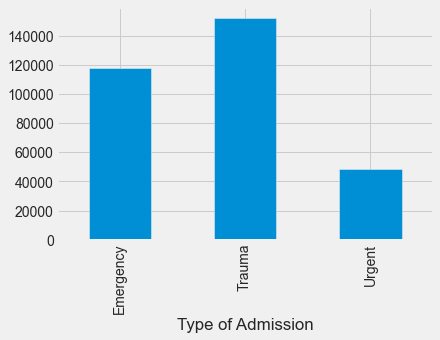

-----------------
Severity of Illness
Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64
3
Stay                     0-10     11-20     21-30     31-40     41-50  \
Severity of Illness                                                     
Extreme              0.010674  0.033030  0.048681  0.031673  0.007383   
Minor                0.024702  0.085043  0.067627  0.045368  0.009421   
Moderate             0.038749  0.127309  0.158442  0.096176  0.020073   

Stay                    51-60     61-70     71-80     81-90    91-100  \
Severity of Illness                                                     
Extreme              0.024422  0.002032  0.008086  0.003495  0.002528   
Minor                0.022384  0.001630  0.006055  0.003093  0.001335   
Moderate             0.063161  0.004955  0.018060  0.008605  0.004820   

Stay                 More than 100 Days  
Severity of Illness                      
Extreme                        0.006124  
Minor

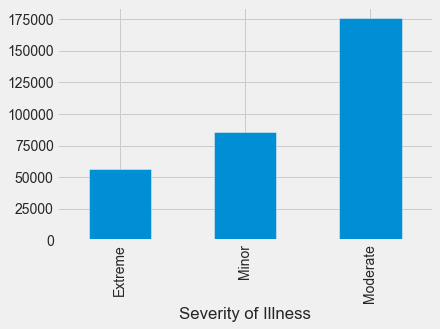

-----------------
Age
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64
10
Stay        0-10     11-20     21-30     31-40     41-50     51-60     61-70  \
Age                                                                            
0-10    0.001931  0.006152  0.004676  0.003184  0.000587  0.001828  0.000082   
11-20   0.004874  0.016779  0.013541  0.008419  0.001602  0.004488  0.000279   
21-30   0.010888  0.035398  0.035781  0.021706  0.004390  0.011911  0.000826   
31-40   0.015438  0.049592  0.058253  0.034267  0.007452  0.020466  0.001598   
41-50   0.014844  0.046976  0.056231  0.034490  0.007873  0.022576  0.001765   
51-60   0.010762  0.035630  0.041006  0.026909  0.005448  0.018022  0.001407   
61-70   0.006890  0.024714  0.028367  0.018622  0.003784  0.012816  0.001021   
71-80   0.006912  0.024991  0.029940  0.020161  0.004343  0.013921  0.0

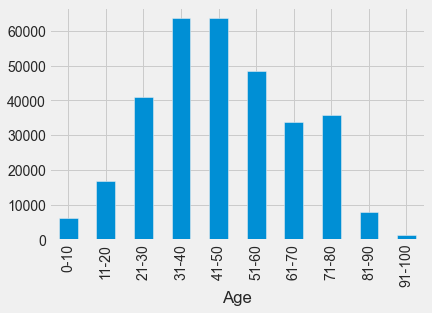

-----------------
Stay
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64
11
Stay                    0-10     11-20     21-30     31-40     41-50  \
Stay                                                                   
0-10                0.074124  0.000000  0.000000  0.000000  0.000000   
11-20               0.000000  0.245382  0.000000  0.000000  0.000000   
21-30               0.000000  0.000000  0.274751  0.000000  0.000000   
31-40               0.000000  0.000000  0.000000  0.173217  0.000000   
41-50               0.000000  0.000000  0.000000  0.000000  0.036877   
51-60               0.000000  0.000000  0.000000  0.000000  0.000000   
61-70               0.000000  0.000000  0.000000  0.000000  0.000

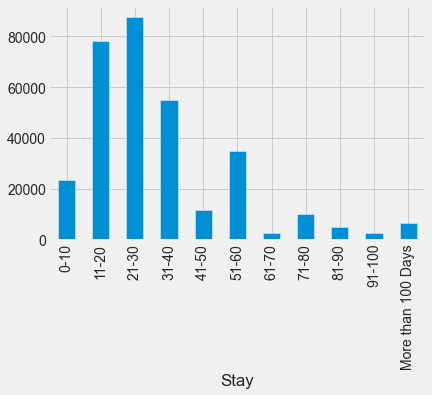

-----------------


In [13]:
for value in category:
    print(value)
    print(data[value].value_counts())
    print(data[value].nunique())
    print(pd.crosstab(data[value], data['Stay']) / len(data))
    data.groupby(value)['Stay'].count().plot.bar()
    plt.show()
    
    print('-----------------')

In [14]:
numeric

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit']

<AxesSubplot:ylabel='Admission_Deposit'>

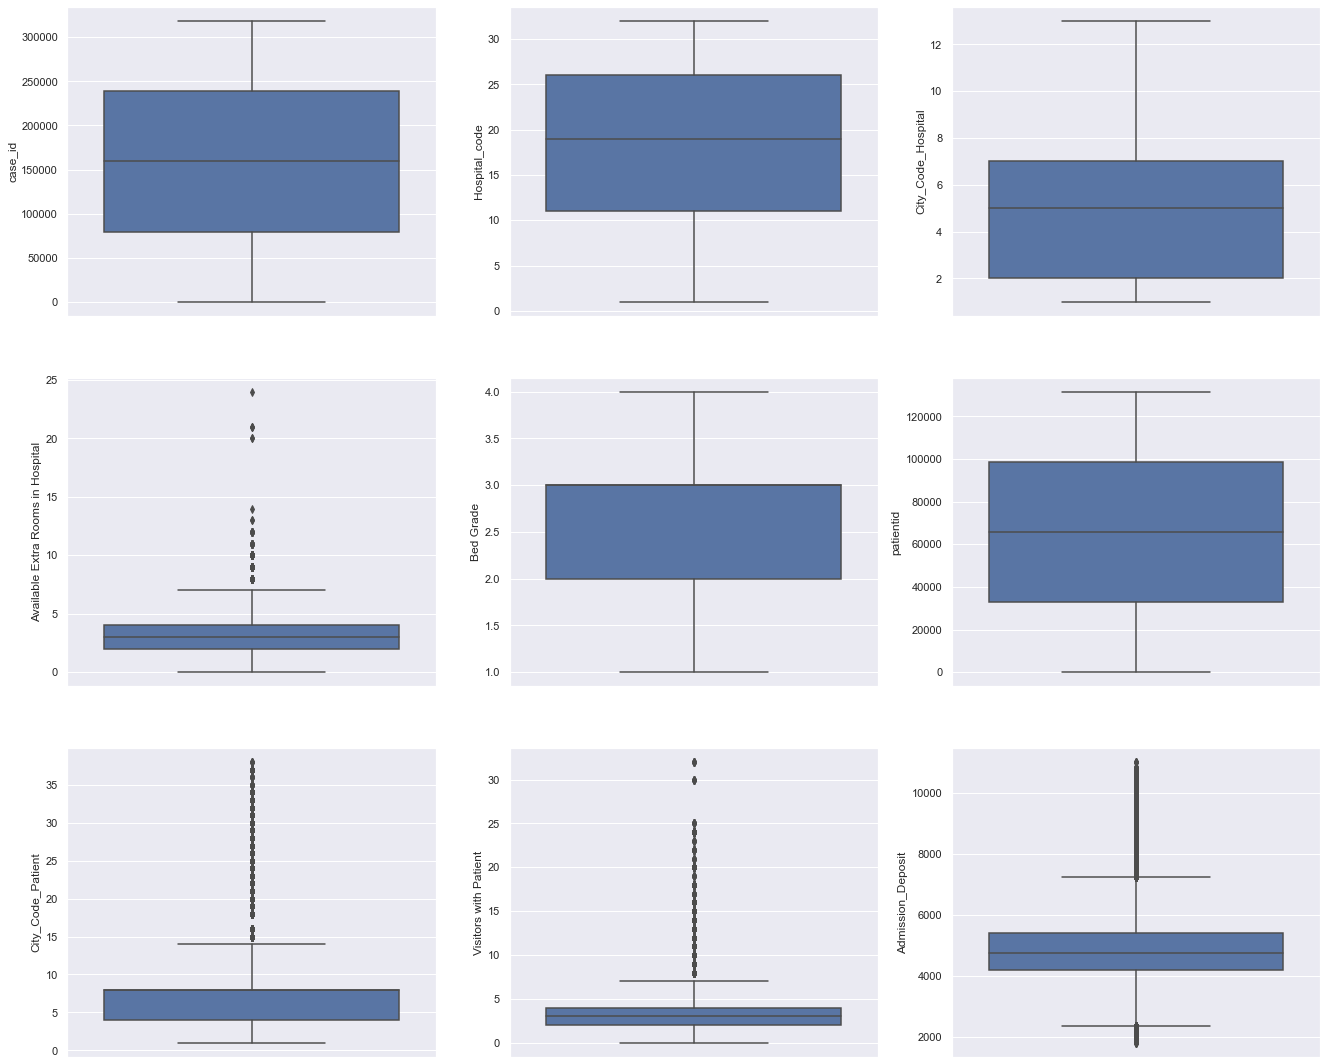

In [15]:
#set seaborn plotting aesthetics as default
sns.set(rc={"figure.figsize":(20,18)}) #width=3, #height=4
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3,3)
#create boxplot in each subplot
sns.boxplot(data=data,  y=data['case_id'], ax=axes[0,0])
sns.boxplot(data=data,  y=data['Hospital_code'], ax=axes[0,1])
sns.boxplot(data=data,  y=data['City_Code_Hospital'], ax=axes[0,2])
sns.boxplot(data=data,  y=data['Available Extra Rooms in Hospital'], ax=axes[1,0])
sns.boxplot(data=data,  y=data['Bed Grade'], ax=axes[1,1])
sns.boxplot(data=data,  y=data['patientid'], ax=axes[1,2])
sns.boxplot(data=data,  y=data['City_Code_Patient'], ax=axes[2,0])
sns.boxplot(data=data,  y=data['Visitors with Patient'], ax=axes[2,1])
sns.boxplot(data=data,  y=data['Admission_Deposit'], ax=axes[2,2])

<AxesSubplot:ylabel='Admission_Deposit'>

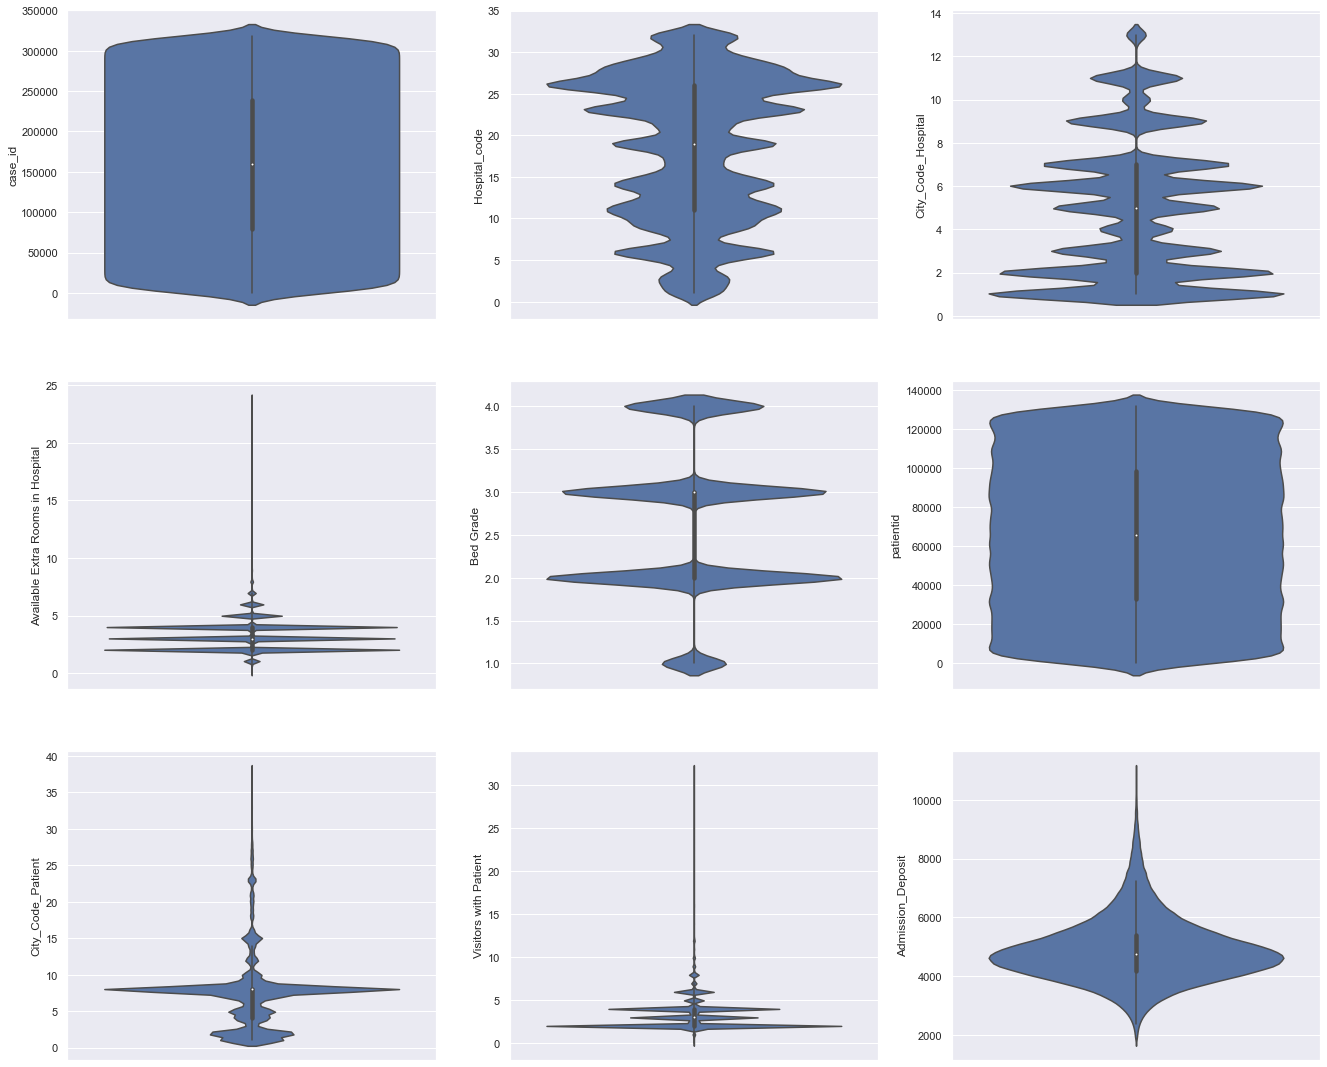

In [16]:
#set seaborn plotting aesthetics as default
sns.set(rc={"figure.figsize":(20,18)}) #width=3, #height=4
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3,3)
#create boxplot in each subplot
sns.violinplot(data=data,  y=data['case_id'], ax=axes[0,0])
sns.violinplot(data=data,  y=data['Hospital_code'], ax=axes[0,1])
sns.violinplot(data=data,  y=data['City_Code_Hospital'], ax=axes[0,2])
sns.violinplot(data=data,  y=data['Available Extra Rooms in Hospital'], ax=axes[1,0])
sns.violinplot(data=data,  y=data['Bed Grade'], ax=axes[1,1])
sns.violinplot(data=data,  y=data['patientid'], ax=axes[1,2])
sns.violinplot(data=data,  y=data['City_Code_Patient'], ax=axes[2,0])
sns.violinplot(data=data,  y=data['Visitors with Patient'], ax=axes[2,1])
sns.violinplot(data=data,  y=data['Admission_Deposit'], ax=axes[2,2])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Count'>

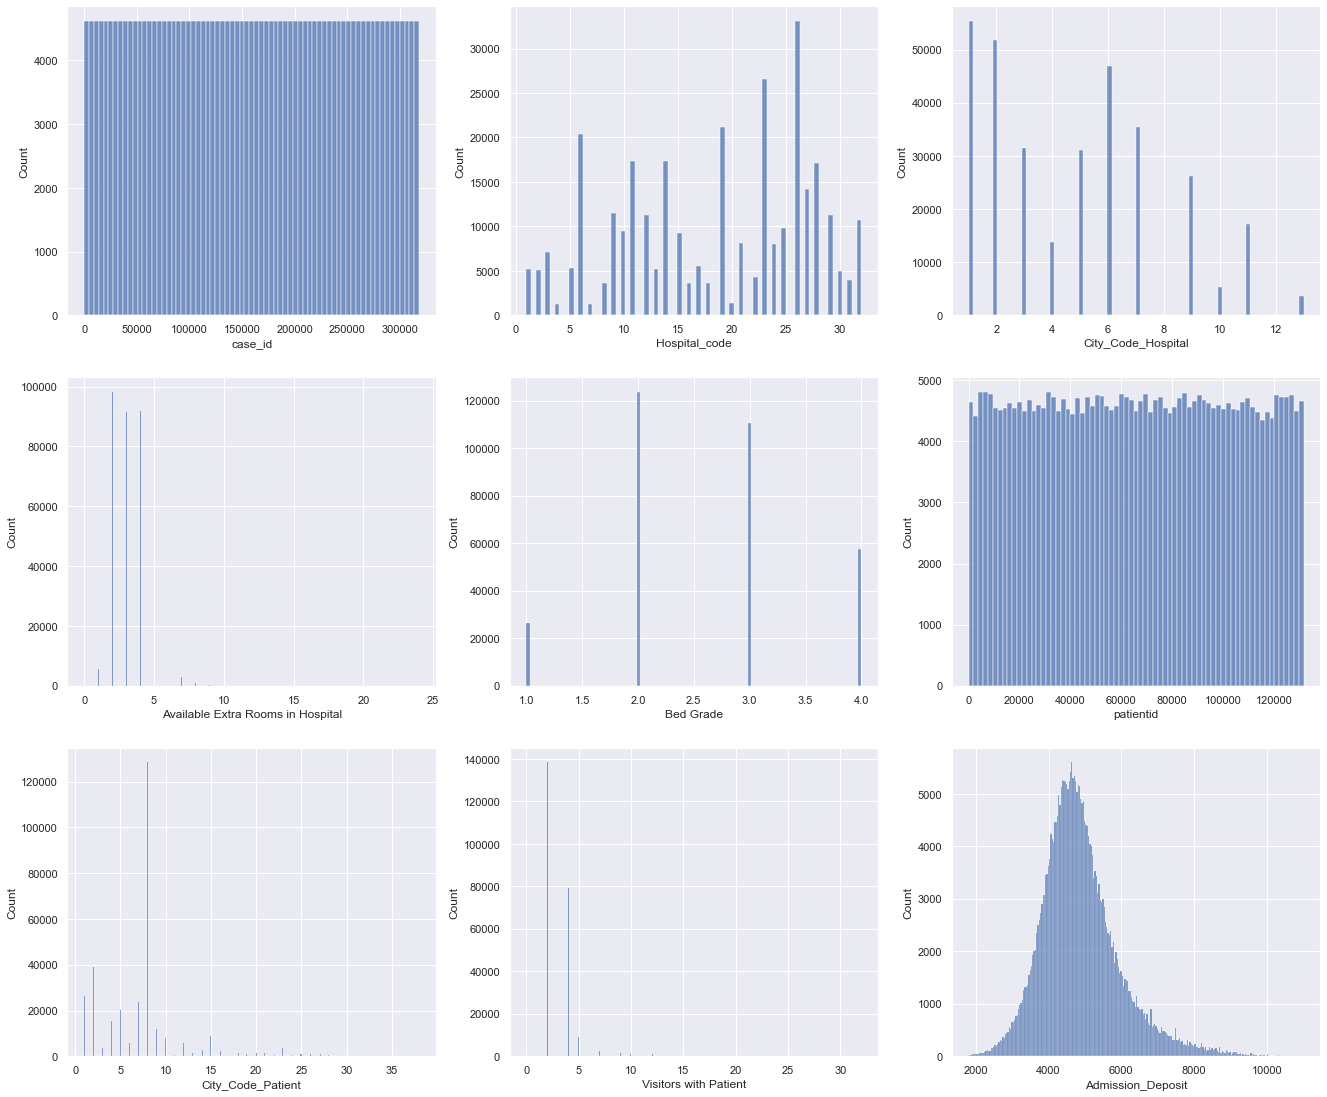

In [17]:
#set seaborn plotting aesthetics as default
sns.set(rc={"figure.figsize":(20,18)}) #width=3, #height=4
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3,3)
#create boxplot in each subplot
sns.histplot(data=data,  x=data['case_id'], ax=axes[0,0])
sns.histplot(data=data,  x=data['Hospital_code'], ax=axes[0,1])
sns.histplot(data=data,  x=data['City_Code_Hospital'], ax=axes[0,2])
sns.histplot(data=data,  x=data['Available Extra Rooms in Hospital'], ax=axes[1,0])
sns.histplot(data=data,  x=data['Bed Grade'], ax=axes[1,1])
sns.histplot(data=data,  x=data['patientid'], ax=axes[1,2])
sns.histplot(data=data,  x=data['City_Code_Patient'], ax=axes[2,0])
sns.histplot(data=data,  x=data['Visitors with Patient'], ax=axes[2,1])
sns.histplot(data=data,  x=data['Admission_Deposit'], ax=axes[2,2])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

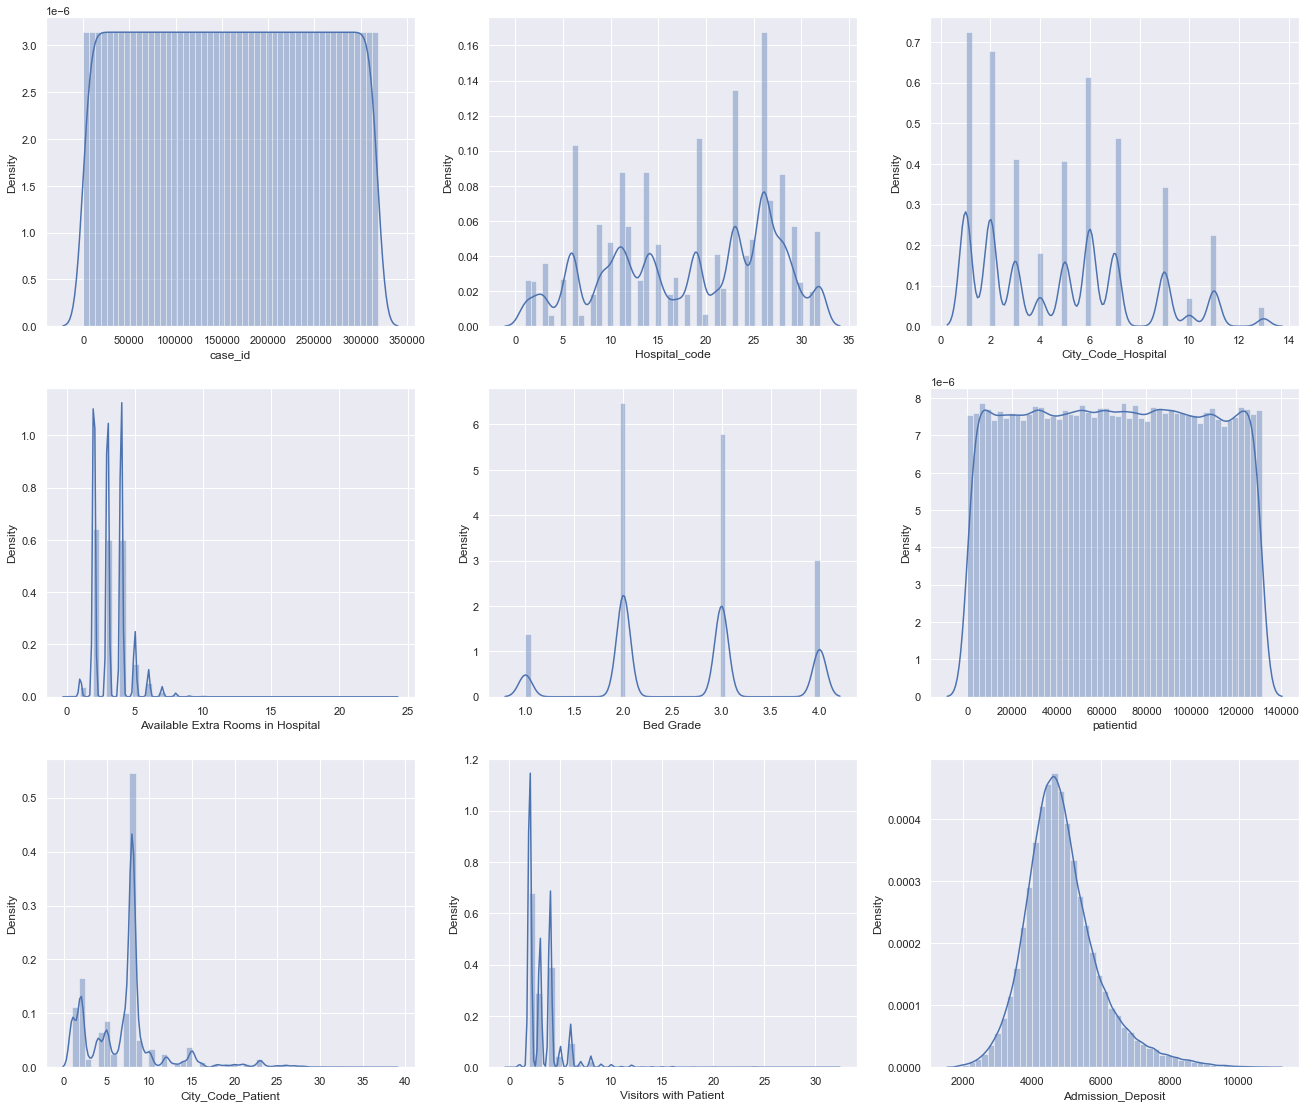

In [18]:
#set seaborn plotting aesthetics as default
sns.set(rc={"figure.figsize":(20,18)}) #width=3, #height=4
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3,3)
#create boxplot in each subplot
sns.distplot(data['case_id'], ax=axes[0,0])
sns.distplot(data['Hospital_code'], ax=axes[0,1])
sns.distplot(data['City_Code_Hospital'], ax=axes[0,2])
sns.distplot(data['Available Extra Rooms in Hospital'], ax=axes[1,0])
sns.distplot(data['Bed Grade'], ax=axes[1,1])
sns.distplot(data['patientid'], ax=axes[1,2])
sns.distplot(data['City_Code_Patient'], ax=axes[2,0])
sns.distplot(data['Visitors with Patient'], ax=axes[2,1])
sns.distplot(data['Admission_Deposit'], ax=axes[2,2])